<a href="https://colab.research.google.com/github/brigitayantie/Stock/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas-datareader

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline





/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
ticker = 'aapl'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']

In [ ]:
log_returns = np.log(1+data.pct_change())
log_returns.tail()


,aapl
Date,
2020-08-24,0.011889
2020-08-25,-0.008238
2020-08-26,0.013507
2020-08-27,-0.012026
2020-08-28,-0.001621


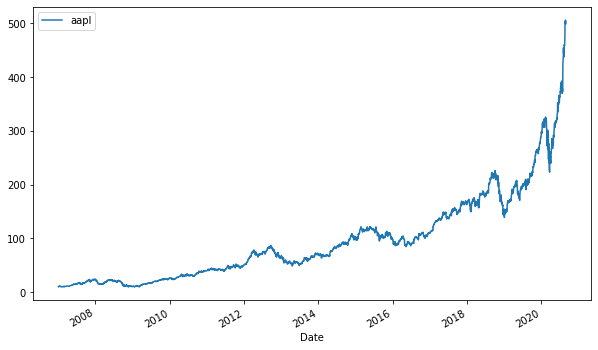

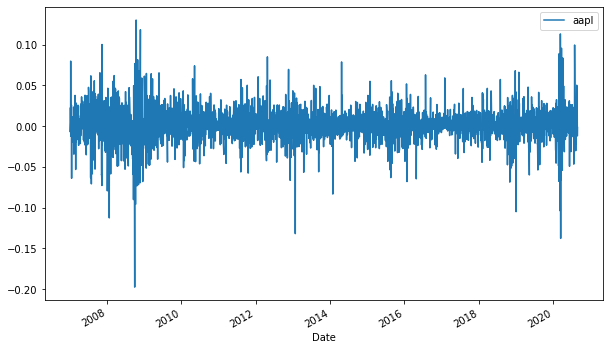

In [ ]:
data.plot(figsize=(10,6)); #stock price
log_returns.plot(figsize=(10,6)) #stock mean  variances



In [ ]:
u = log_returns.mean() #determining mean
u



aapl    0.001128
dtype: float64

In [ ]:
var = log_returns.var() #determining variance
var



aapl    0.000417
dtype: float64

In [ ]:
#drift = u - (0.5) * var (best approx future rate stock)

drift = u-(0.5*var)
drift

aapl    0.000919
dtype: float64

In [ ]:
#predict daily stock price aapl

stdev = log_returns.std() #standard deviation log returns
stdev

aapl    0.020411
dtype: float64

In [ ]:
#Brownian motion = drift + stdev * e^r

type(drift)
type(stdev)
np.array(drift)




array([0.00091926])

In [ ]:
drift.values


array([0.00091926])

In [ ]:
stdev.values

array([0.02041098])

In [ ]:
norm.ppf(0.95)


1.6448536269514722

In [ ]:
x = np.random.rand(10,2)
x



array([[0.6715455 , 0.45398722],
       [0.51451177, 0.04958452],
       [0.76768251, 0.4384801 ],
       [0.52406572, 0.20871264],
       [0.84417471, 0.65210508],
       [0.47338676, 0.59761365],
       [0.93470712, 0.86013657],
       [0.96465275, 0.76420424],
       [0.8708678 , 0.6830111 ],
       [0.50619222, 0.84918029]])

In [ ]:
norm.ppf(x)

array([[ 0.44418478, -0.11559385],
       [ 0.03638365, -1.64889557],
       [ 0.73123607, -0.15482382],
       [ 0.06036046, -0.81089621],
       [ 1.01176468,  0.39101   ],
       [-0.06675905,  0.24717512],
       [ 1.51179602,  1.08093314],
       [ 1.80743485,  0.71989197],
       [ 1.13050285,  0.47613558],
       [ 0.01552222,  1.03292412]])

In [ ]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.46756956,  0.78436132],
       [ 1.07685156, -1.28224169],
       [-0.39724235, -0.14091155],
       [-0.37035943,  1.60115786],
       [ 0.77424555,  1.0007447 ],
       [ 0.33603884,  1.86236249],
       [ 0.29326736, -1.31597686],
       [-0.05764238, -0.84996846],
       [ 1.34242168, -0.73011168],
       [ 0.10128743,  0.3775383 ]])

In [ ]:
t_intervals = 1000
iterations = 100

In [ ]:
#daily_returns = e'
#r = drift +stdev * z

In [ ]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf (np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.9978742 , 0.986846  , 0.99703287, ..., 0.99390239, 0.96319309,
        0.98985351],
       [0.98935797, 0.98306159, 1.02183399, ..., 0.99391072, 0.97482357,
        1.00726673],
       [0.95982372, 1.02125917, 0.9827541 , ..., 1.02102898, 0.99860407,
        1.02052069],
       ...,
       [0.98721677, 0.99188615, 1.01153503, ..., 0.99952631, 0.99776334,
        0.98833614],
       [0.99014195, 0.9799669 , 1.02345462, ..., 0.99109664, 1.01275131,
        1.05174708],
       [1.00403118, 0.97938074, 1.01419547, ..., 0.98675494, 0.98850249,
        0.99642314]])

Si = So * daily_return(i)
Si+1 = Si * daily_return(i+1)
Si+999 = Si * daily_return(i+999)

In [ ]:
S0 = data.iloc[-1]
S0

aapl    499.230011
Name: 2020-08-28 00:00:00, dtype: float64

In [ ]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_list[0] = S0
price_list

array([[499.23001099, 499.23001099, 499.23001099, ..., 499.23001099,
        499.23001099, 499.23001099],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
for t in range(1,t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

price_list


array([[ 499.23001099,  499.23001099,  499.23001099, ...,  499.23001099,
         499.23001099,  499.23001099],
       [ 493.91719073,  490.77385009,  510.13019278, ...,  496.1900614 ,
         486.66118075,  502.85778208],
       [ 474.07343545,  501.20729334,  501.33253819, ...,  506.62443356,
         485.9818357 ,  513.17676985],
       ...,
       [1329.70963177, 1172.77239146,  685.86740182, ..., 1920.87480041,
        1537.90376617,  805.24340868],
       [1316.60128871, 1149.27812968,  701.95415934, ..., 1903.77256695,
        1557.51404841,  846.91240546],
       [1321.90874521, 1125.58086445,  711.91872771, ..., 1878.55698073,
        1539.60652019,  843.88312208]])

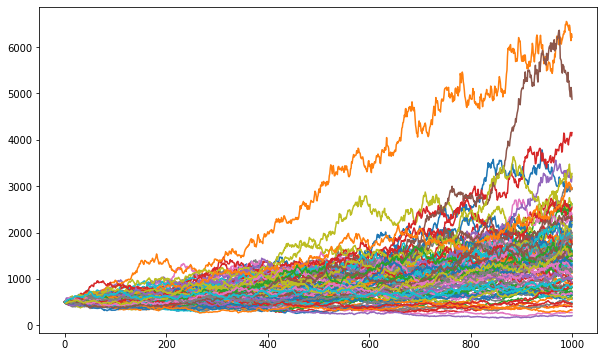

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list);